pip install nltk

In [ ]:
import nltk
nltk.download()

In [1]:
input = "Barack Obama went as a prime minister of USA in the year of 2015 . PM MODI is the prime minister of INDIA."
print(input)

Barack Obama went as a prime minister of USA in the year of 2015 . PM MODI is the prime minister of INDIA.


In [2]:
#(1)lowercase
lowercase = input.lower()
print("LOWERCSE = ", lowercase)

#re
#pip install re
import re
lowercase_re = re.sub('2015', '2025', lowercase)
print("REGULAR EXP1 = ", lowercase_re)
lowercase_re = re.sub('[a-m]', '*', lowercase)
print("REGULAR EXP2 = ", lowercase_re)
lowercase_re = re.sub('\d', '-', lowercase)
print("REGULAR EXP3 = ", lowercase_re)

LOWERCSE =  barack obama went as a prime minister of usa in the year of 2015 . pm modi is the prime minister of india.
REGULAR EXP1 =  barack obama went as a prime minister of usa in the year of 2025 . pm modi is the prime minister of india.
REGULAR EXP2 =  **r*** o**** w*nt *s * pr*** **n*st*r o* us* *n t** y**r o* 2015 . p* *o** *s t** pr*** **n*st*r o* *n***.
REGULAR EXP3 =  barack obama went as a prime minister of usa in the year of ---- . pm modi is the prime minister of india.


In [4]:
#(2)Tokenization
import nltk
from nltk import word_tokenize, sent_tokenize

word_tokens = word_tokenize(input)
print("WORD TOKENS = ", word_tokens)
print(len(word_tokens))
sent_tokens = sent_tokenize(input)
print("SENT TOKENS = ", sent_tokens)
print(len(sent_tokens))

WORD TOKENS =  ['Barack', 'Obama', 'went', 'as', 'a', 'prime', 'minister', 'of', 'USA', 'in', 'the', 'year', 'of', '2015', '.', 'PM', 'MODI', 'is', 'the', 'prime', 'minister', 'of', 'INDIA', '.']
24
SENT TOKENS =  ['Barack Obama went as a prime minister of USA in the year of 2015 .', 'PM MODI is the prime minister of INDIA.']
2


In [5]:
#(3)stopwords Removal
from nltk.corpus import stopwords
#print(stopwords.fileids())
stopwords = set(stopwords.words('english'))
#print("\n", stopwords)

tokens_stopwords = []
for token in word_tokens:
    if token not in stopwords:
        tokens_stopwords.append(token)
print(' '.join(tokens_stopwords))

Barack Obama went prime minister USA year 2015 . PM MODI prime minister INDIA .


In [6]:
#Stemmer
stemming = []
from nltk import PorterStemmer
for word in tokens_stopwords:
    stemming.append(PorterStemmer().stem(word))
print(stemming)

['barack', 'obama', 'went', 'prime', 'minist', 'usa', 'year', '2015', '.', 'pm', 'modi', 'prime', 'minist', 'india', '.']


In [8]:
#Lemmatizer
from nltk import WordNetLemmatizer
lma = []
for word in tokens_stopwords:
    lma.append(WordNetLemmatizer().lemmatize(word))
print(lma)

['Barack', 'Obama', 'went', 'prime', 'minister', 'USA', 'year', '2015', '.', 'PM', 'MODI', 'prime', 'minister', 'INDIA', '.']


In [9]:
#POS Tags
from nltk import pos_tag
print(pos_tag(word_tokens))

[('Barack', 'NNP'), ('Obama', 'NNP'), ('went', 'VBD'), ('as', 'IN'), ('a', 'DT'), ('prime', 'JJ'), ('minister', 'NN'), ('of', 'IN'), ('USA', 'NNP'), ('in', 'IN'), ('the', 'DT'), ('year', 'NN'), ('of', 'IN'), ('2015', 'CD'), ('.', '.'), ('PM', 'NNP'), ('MODI', 'NNP'), ('is', 'VBZ'), ('the', 'DT'), ('prime', 'JJ'), ('minister', 'NN'), ('of', 'IN'), ('INDIA', 'NNP'), ('.', '.')]


In [10]:
from nltk.corpus import brown
brown.words()

['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', ...]

In [11]:
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [15]:
text1

<Text: Moby Dick by Herman Melville 1851>

In [16]:
text2

<Text: Sense and Sensibility by Jane Austen 1811>

In [17]:
text1.concordance("monstrous")

Displaying 11 of 11 matches:
ong the former , one was of a most monstrous size . ... This came towards us , 
ON OF THE PSALMS . " Touching that monstrous bulk of the whale or ork we have r
ll over with a heathenish array of monstrous clubs and spears . Some were thick
d as you gazed , and wondered what monstrous cannibal and savage could ever hav
that has survived the flood ; most monstrous and most mountainous ! That Himmal
they might scout at Moby Dick as a monstrous fable , or still worse and more de
th of Radney .'" CHAPTER 55 Of the Monstrous Pictures of Whales . I shall ere l
ing Scenes . In connexion with the monstrous pictures of whales , I am strongly
ere to enter upon those still more monstrous stories of them which are to be fo
ght have been rummaged out of this monstrous cabinet there is no telling . But 
of Whale - Bones ; for Whales of a monstrous size are oftentimes cast up dead u


In [18]:
text1.similar("monstrous")

true contemptible christian abundant few part mean careful puzzled
mystifying passing curious loving wise doleful gamesome singular
delightfully perilous fearless


In [19]:
text2.similar("monstrous")

very so exceedingly heartily a as good great extremely remarkably
sweet vast amazingly


In [20]:
!pip install spacy

# NAMED ENTITY RECOGNITION

In [21]:
import nltk
from nltk import word_tokenize, pos_tag, ne_chunk, sent_tokenize

input = "Barack Obama went as a prime minister of USA in the year of 2015 . PM MODI is the prime minister of INDIA."
ner = ne_chunk(pos_tag(word_tokenize(input)))
# print(ner)

from nltk.tree import Tree
named_entity = []
for subtree in ner:
    if isinstance(subtree, Tree):
        entity = "".join([token for token, pos in subtree.leaves()])
        named_entity.append(entity)
print(named_entity)

['Barack', 'Obama', 'USA', 'INDIA']


In [25]:
!python -m spacy download en_core_web_sm


     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
      --------------------------------------- 0.3/12.8 MB ? eta -:--:--
      --------------------------------------- 0.3/12.8 MB ? eta -:--:--
      --------------------------------------- 0.3/12.8 MB ? eta -:--:--
     - ------------------------------------- 0.5/12.8 MB 409.6 kB/s eta 0:00:30
     -- ------------------------------------ 0.8/12.8 MB 599.2 kB/s eta 0:00:21
     -- ------------------------------------ 0.8/12.8 MB 599.2 kB/s eta 0:00:21
     --- ----------------------------------- 1.0/12.8 MB 547.3 kB/s eta 0:00:22
     --- ----------------------------------- 1.0/12.8 MB 547.3 kB/s eta 0:00:22
     --- ----------------------------------- 1.3/12.8 MB 588.8 kB/s eta 0:00:20
     --- ----------------------------------- 1.3/12.8 MB 588.8 kB/s eta 0:00:20
     ---- ---------------------------------- 1.6/12.8 MB 586.7 kB/s eta 0:00:20


In [26]:
#pip install spacy
import spacy
nlp = spacy.load("en_core_web_sm")

text = "Barack Obama went as a prime minister of USA in the year of 2015 . PM MODI is the prime minister of INDIA."
doc = nlp(text)
named_entity = []
for ent in doc.ents:
    named_entity.append(ent.text)
print(named_entity)

['Barack Obama', 'USA', 'the year of 2015', 'PM MODI', 'INDIA']


# Predictive Analysis

In [27]:
# TF-IDF
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
#pip install scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

stopwords = set(stopwords.words('english'))
ps = PorterStemmer()
vector = TfidfVectorizer()

documents= [ "apple boy cat", "apple cat dog", "dog egg fan" ]

preprocessed = []
for doc in documents:
    tokenization = word_tokenize(doc)
    stop = [ps.stem(word) for word in tokenization if word not in stopwords]
    preprocessed.append(" ".join(stop))
print(preprocessed)
word_score = vector.fit_transform(preprocessed)
print(word_score)

['appl boy cat', 'appl cat dog', 'dog egg fan']
<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 9 stored elements and shape (3, 6)>
  Coords	Values
  (0, 0)	0.5178561161676974
  (0, 1)	0.680918560398684
  (0, 2)	0.5178561161676974
  (1, 0)	0.5773502691896257
  (1, 2)	0.5773502691896257
  (1, 3)	0.5773502691896257
  (2, 3)	0.4736296010332684
  (2, 4)	0.6227660078332259
  (2, 5)	0.6227660078332259


# SIMPLE LINEAR REGRESSION

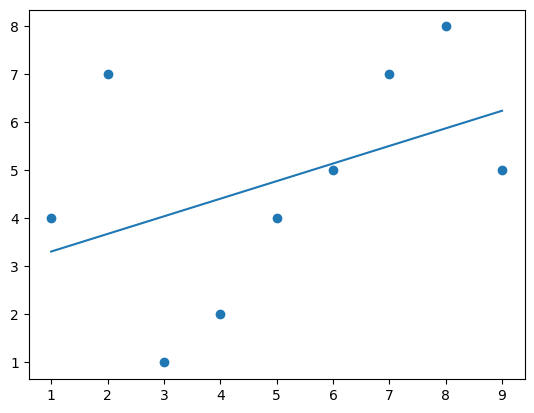

In [28]:
import matplotlib.pyplot as plt

x = [1,2,3,4,5,6,7,8,9]
y = [4,7,1,2,4,5,7,8,5]

def slr(x):
    return slope * x + intercept

from scipy import stats
slope, intercept, r, p, std_err = stats.linregress(x,y)

model = list(map(slr, x))
plt.plot(x, model)

plt.scatter(x,y)
plt.show()

# MULTIPLE LINEAR REGRESSION

In [29]:
import pandas as pd
iris = pd.read_csv("IRIS.csv")
print(iris)
import numpy as np

x = iris[['SepalLengthCm', 'SepalWidthCm']]
y = iris.PetalLengthCm

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

from sklearn.linear_model import LinearRegression
LR = LinearRegression()
training = LR.fit(x_train, y_train)
y_pred = LR.predict(x_test)
print(y_pred)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  

# SLR $ MLR with Performance Metrics

In [2]:
import pandas as pd
iris = pd.read_csv("IRIS.csv")
print(iris)

import numpy as np

x = iris[['SepalLengthCm', 'SepalWidthCm']]
y = iris.PetalLengthCm

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

from sklearn.linear_model import LinearRegression
LR = LinearRegression()

training = LR.fit(x_train, y_train)
y_pred = LR.predict(x_test)
print(y_pred, "\n")

#pip install numpy
import numpy as np
from sklearn import metrics

MAE = metrics.mean_absolute_error(y_test, y_pred)
print("Mean Absoute Error: ", MAE)
MSE = metrics.mean_squared_error(y_test, y_pred)
print("Mean Squeared Error: ", MSE)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print("RMSE: ", RMSE)


import numpy as np

x = iris[['SepalLengthCm']]
y = iris.PetalLengthCm

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

from sklearn.linear_model import LinearRegression
LR = LinearRegression()

training = LR.fit(x_train, y_train)
y_pred = LR.predict(x_test)
print(y_pred, "\n")

#pip install numpy
import numpy as np
from sklearn import metrics

MAE = metrics.mean_absolute_error(y_test, y_pred)
print("Mean Absoute Error: ", MAE)
MSE = metrics.mean_squared_error(y_test, y_pred)
print("Mean Squeared Error: ", MSE)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print("RMSE: ", RMSE)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  

# CLASSIFICATION

In [1]:
from sklearn import datasets

iris = datasets.load_iris()
x = iris.data
y = iris.target

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test  = train_test_split(x,y,train_size=0.8)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

train = knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print(y_pred)

[2 0 2 0 1 1 0 1 0 2 2 2 0 1 2 0 1 2 1 1 0 0 0 2 0 1 1 1 2 1]


# KNN

In [3]:
from sklearn import datasets
iris = datasets.load_iris()

x = iris.data
y = iris.target

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.8)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

train = knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print(y_pred)
y_auc = knn.predict_proba(x_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
Accuracy = accuracy_score(y_test, y_pred)
Precision = precision_score(y_test, y_pred, average='macro')
Recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
auc = roc_auc_score(y_test, y_auc, multi_class='ovr')

print("\nAccuracy : ", Accuracy)
print("Precision : ", Precision)
print("Recall : ", Recall)
print("F1-SCORE : ", f1)
print("AUC : ", auc)

[1 0 1 0 2 0 0 2 2 2 0 0 1 0 2 0 2 0 1 2 0 2 2 1 1 0 1 0 2 2]

Accuracy :  0.9333333333333333
Precision :  0.9393939393939394
Recall :  0.9259259259259259
F1-SCORE :  0.9249999999999999
AUC :  0.9947089947089948


# Decision Tree

In [1]:
from sklearn import datasets
iris = datasets.load_iris()

x = iris.data
y = iris.target

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.8)

from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()

train = DT.fit(x_train, y_train)
y_pred = DT.predict(x_test)
print(y_pred)
y_auc = DT.predict_proba(x_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
Accuracy = accuracy_score(y_test, y_pred)
Precision = precision_score(y_test, y_pred, average='macro')
Recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
auc = roc_auc_score(y_test, y_auc, multi_class='ovr')

print("\nAccuracy : ", Accuracy)
print("Precision : ", Precision)
print("Recall : ", Recall)
print("F1-SCORE : ", f1)
print("AUC : ", auc)

[0 0 2 2 0 0 0 2 2 0 0 2 2 0 2 2 0 1 0 0 1 1 1 1 1 2 1 2 1 2]

Accuracy :  0.9333333333333333
Precision :  0.9280303030303031
Recall :  0.9280303030303031
F1-SCORE :  0.9280303030303031
AUC :  0.9476674641148325


# RANDOM FOREST

In [2]:
from sklearn import datasets
iris = datasets.load_iris()

x = iris.data
y = iris.target

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.8)

from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()

train = RF.fit(x_train, y_train)
y_pred = RF.predict(x_test)
print(y_pred)
y_auc = RF.predict_proba(x_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
Accuracy = accuracy_score(y_test, y_pred)
Precision = precision_score(y_test, y_pred, average='macro')
Recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
auc = roc_auc_score(y_test, y_auc, multi_class='ovr')

print("\nAccuracy : ", Accuracy)
print("Precision : ", Precision)
print("Recall : ", Recall)
print("F1-SCORE : ", f1)
print("AUC : ", auc)

[1 0 2 1 1 2 1 1 0 2 2 2 0 2 1 1 0 1 2 1 2 0 0 2 2 0 2 0 1 2]

Accuracy :  1.0
Precision :  1.0
Recall :  1.0
F1-SCORE :  1.0
AUC :  1.0


# SVM

In [3]:
from sklearn import datasets
iris = datasets.load_iris()

x = iris.data
y = iris.target

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.8)

from sklearn import svm
svc_cl = svm.SVC(probability=True)

train = svc_cl.fit(x_train, y_train)
y_pred = svc_cl.predict(x_test)
print(y_pred)
y_auc = svc_cl.predict_proba(x_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
Accuracy = accuracy_score(y_test, y_pred)
Precision = precision_score(y_test, y_pred, average='macro')
Recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
auc = roc_auc_score(y_test, y_auc, multi_class='ovr')

print("\nAccuracy : ", Accuracy)
print("Precision : ", Precision)
print("Recall : ", Recall)
print("F1-SCORE : ", f1)
print("AUC : ", auc)

[2 2 2 1 2 0 2 1 2 1 1 0 2 1 2 0 1 1 0 0 1 1 0 2 0 2 1 0 2 2]

Accuracy :  0.9333333333333333
Precision :  0.9388888888888888
Recall :  0.9388888888888888
F1-SCORE :  0.9388888888888888
AUC :  0.9935802469135803


# EDA.doxs

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data = pd.read_csv(r"C:house_prices.csv")
print(data)

         Index                                              Title  \
0            0  1 BHK Ready to Occupy Flat for sale in Srushti...   
1            1  2 BHK Ready to Occupy Flat for sale in Dosti V...   
2            2  2 BHK Ready to Occupy Flat for sale in Sunrise...   
3            3        1 BHK Ready to Occupy Flat for sale Kasheli   
4            4  2 BHK Ready to Occupy Flat for sale in TenX Ha...   
...        ...                                                ...   
187526  187526  3 BHK Ready to Occupy Flat for sale in Bollywo...   
187527  187527  3 BHK Ready to Occupy Flat for sale in Sushma ...   
187528  187528  3 BHK Ready to Occupy Flat for sale in Bollywo...   
187529  187529  2 BHK Ready to Occupy Flat for sale in Friends...   
187530  187530  3 BHK Ready to Occupy Flat for sale in Affinit...   

                                              Description Amount(in rupees)  \
0       Bhiwandi, Thane has an attractive 1 BHK Flat f...           42 Lac    
1       One c

In [3]:
data.head(10)

Index                                              Title  \
0      0  1 BHK Ready to Occupy Flat for sale in Srushti...   
1      1  2 BHK Ready to Occupy Flat for sale in Dosti V...   
2      2  2 BHK Ready to Occupy Flat for sale in Sunrise...   
3      3        1 BHK Ready to Occupy Flat for sale Kasheli   
4      4  2 BHK Ready to Occupy Flat for sale in TenX Ha...   
5      5  1 BHK Ready to Occupy Flat for sale in Virat A...   
6      6         1 BHK Ready to Occupy Flat for sale Mumbra   
7      7          1 BHK Ready to Occupy Flat for sale Kalwa   
8      8          1 BHK Ready to Occupy Flat for sale Kalwa   
9      9  3 BHK Ready to Occupy Flat for sale in Pride P...   

                                         Description Amount(in rupees)  \
0  Bhiwandi, Thane has an attractive 1 BHK Flat f...           42 Lac    
1  One can find this stunning 2 BHK flat for sale...           98 Lac    
2  Up for immediate sale is a 2 BHK apartment in ...          1.40 Cr    
3  This beautiful 1 BHK Flat is available for sal...           25 Lac    
4  This lovely 2 BHK Flat in Pokhran Road, Thane ...          1.60 Cr    
5  Creatively planned and constructed is a 1 BHK ...           45 Lac    
6  This magnificent 1 BHK Flat is available for s...         16.5 Lac    
7  Creatively planned and constructed is a 1 BHK ...           60 Lac    
8  Discover this immaculate 1 BHK flat for sale a...           60 Lac    
9  One can find this stunning 3 BHK flat for sale...          1.60 Cr    

   Price (in rupees) location Carpet Area         Status            Floor  \
0             6000.0    thane    500 sqft  Ready to Move     10 out of 11   
1            13799.0    thane    473 sqft  Ready to Move      3 out of 22   
2            17500.0    thane    779 sqft  Ready to Move     10 out of 29   
3                NaN    thane    530 sqft  Ready to Move       1 out of 3   
4            18824.0    thane    635 sqft  Ready to Move     20 out of 42   
5             6618.0    thane         NaN  Ready to Move       2 out of 7   
6             2538.0    thane    550 sqft  Ready to Move       4 out of 5   
7            10435.0    thane         NaN  Ready to Move  Ground out of 7   
8            10000.0    thane         NaN  Ready to Move  Ground out of 2   
9            11150.0    thane    900 sqft  Ready to Move      3 out of 27   

  Transaction  ... facing             overlooking  \
0      Resale  ...    NaN                     NaN   
1      Resale  ...   East             Garden/Park   
2      Resale  ...   East             Garden/Park   
3      Resale  ...    NaN                     NaN   
4      Resale  ...   West  Garden/Park, Main Road   
5      Resale  ...   East  Garden/Park, Main Road   
6      Resale  ...    NaN                     NaN   
7      Resale  ...    NaN                     NaN   
8      Resale  ...    NaN                     NaN   
9      Resale  ...   East             Garden/Park   

                               Society Bathroom Balcony Car Parking  \
0  Srushti Siddhi Mangal Murti Complex        1       2         NaN   
1                          Dosti Vihar        2     NaN      1 Open   
2                 Sunrise by Kalpataru        2     NaN   1 Covered   
3                                  NaN        1       1         NaN   
4          TenX Habitat Raymond Realty        2     NaN   1 Covered   
5                         Virat Aangan        1       1         NaN   
6                                  NaN        1     NaN         NaN   
7                                  NaN        1     NaN         NaN   
8                                  NaN        1     NaN         NaN   
9                          Pride Palms        3       1   1 Covered   

              Ownership Super Area Dimensions  Plot Area  
0                   NaN        NaN        NaN        NaN  
1              Freehold        NaN        NaN        NaN  
2              Freehold        NaN        NaN        NaN  
3                   NaN        NaN        Na

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187531 entries, 0 to 187530
Data columns (total 21 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Index              187531 non-null  int64  
 1   Title              187531 non-null  object 
 2   Description        184508 non-null  object 
 3   Amount(in rupees)  187531 non-null  object 
 4   Price (in rupees)  169866 non-null  float64
 5   location           187531 non-null  object 
 6   Carpet Area        106858 non-null  object 
 7   Status             186916 non-null  object 
 8   Floor              180454 non-null  object 
 9   Transaction        187448 non-null  object 
 10  Furnishing         184634 non-null  object 
 11  facing             117298 non-null  object 
 12  overlooking        106095 non-null  object 
 13  Society            77853 non-null   object 
 14  Bathroom           186703 non-null  object 
 15  Balcony            138596 non-null  object 
 16  Ca

In [5]:
!pip install ydata-profiling

In [6]:
from ydata_profiling import ProfileReport
prof = ProfileReport(data)
prof.to_file(output_file='EDA.html')
from IPython.core.display import display, HTML
display(HTML(prof.to_html()))


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████| 21/21 [00:15<00:00,  1.38it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_8684\3077517388.py:4: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython.display
  from IPython.core.display import display, HTML


# Data Cleaning.docx

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [8]:
data = pd.read_csv(r"C:house_prices.csv")
print(data)

         Index                                              Title  \
0            0  1 BHK Ready to Occupy Flat for sale in Srushti...   
1            1  2 BHK Ready to Occupy Flat for sale in Dosti V...   
2            2  2 BHK Ready to Occupy Flat for sale in Sunrise...   
3            3        1 BHK Ready to Occupy Flat for sale Kasheli   
4            4  2 BHK Ready to Occupy Flat for sale in TenX Ha...   
...        ...                                                ...   
187526  187526  3 BHK Ready to Occupy Flat for sale in Bollywo...   
187527  187527  3 BHK Ready to Occupy Flat for sale in Sushma ...   
187528  187528  3 BHK Ready to Occupy Flat for sale in Bollywo...   
187529  187529  2 BHK Ready to Occupy Flat for sale in Friends...   
187530  187530  3 BHK Ready to Occupy Flat for sale in Affinit...   

                                              Description Amount(in rupees)  \
0       Bhiwandi, Thane has an attractive 1 BHK Flat f...           42 Lac    
1       One c

In [9]:
data.head(10)

Index                                              Title  \
0      0  1 BHK Ready to Occupy Flat for sale in Srushti...   
1      1  2 BHK Ready to Occupy Flat for sale in Dosti V...   
2      2  2 BHK Ready to Occupy Flat for sale in Sunrise...   
3      3        1 BHK Ready to Occupy Flat for sale Kasheli   
4      4  2 BHK Ready to Occupy Flat for sale in TenX Ha...   
5      5  1 BHK Ready to Occupy Flat for sale in Virat A...   
6      6         1 BHK Ready to Occupy Flat for sale Mumbra   
7      7          1 BHK Ready to Occupy Flat for sale Kalwa   
8      8          1 BHK Ready to Occupy Flat for sale Kalwa   
9      9  3 BHK Ready to Occupy Flat for sale in Pride P...   

                                         Description Amount(in rupees)  \
0  Bhiwandi, Thane has an attractive 1 BHK Flat f...           42 Lac    
1  One can find this stunning 2 BHK flat for sale...           98 Lac    
2  Up for immediate sale is a 2 BHK apartment in ...          1.40 Cr    
3  This beautiful 1 BHK Flat is available for sal...           25 Lac    
4  This lovely 2 BHK Flat in Pokhran Road, Thane ...          1.60 Cr    
5  Creatively planned and constructed is a 1 BHK ...           45 Lac    
6  This magnificent 1 BHK Flat is available for s...         16.5 Lac    
7  Creatively planned and constructed is a 1 BHK ...           60 Lac    
8  Discover this immaculate 1 BHK flat for sale a...           60 Lac    
9  One can find this stunning 3 BHK flat for sale...          1.60 Cr    

   Price (in rupees) location Carpet Area         Status            Floor  \
0             6000.0    thane    500 sqft  Ready to Move     10 out of 11   
1            13799.0    thane    473 sqft  Ready to Move      3 out of 22   
2            17500.0    thane    779 sqft  Ready to Move     10 out of 29   
3                NaN    thane    530 sqft  Ready to Move       1 out of 3   
4            18824.0    thane    635 sqft  Ready to Move     20 out of 42   
5             6618.0    thane         NaN  Ready to Move       2 out of 7   
6             2538.0    thane    550 sqft  Ready to Move       4 out of 5   
7            10435.0    thane         NaN  Ready to Move  Ground out of 7   
8            10000.0    thane         NaN  Ready to Move  Ground out of 2   
9            11150.0    thane    900 sqft  Ready to Move      3 out of 27   

  Transaction  ... facing             overlooking  \
0      Resale  ...    NaN                     NaN   
1      Resale  ...   East             Garden/Park   
2      Resale  ...   East             Garden/Park   
3      Resale  ...    NaN                     NaN   
4      Resale  ...   West  Garden/Park, Main Road   
5      Resale  ...   East  Garden/Park, Main Road   
6      Resale  ...    NaN                     NaN   
7      Resale  ...    NaN                     NaN   
8      Resale  ...    NaN                     NaN   
9      Resale  ...   East             Garden/Park   

                               Society Bathroom Balcony Car Parking  \
0  Srushti Siddhi Mangal Murti Complex        1       2         NaN   
1                          Dosti Vihar        2     NaN      1 Open   
2                 Sunrise by Kalpataru        2     NaN   1 Covered   
3                                  NaN        1       1         NaN   
4          TenX Habitat Raymond Realty        2     NaN   1 Covered   
5                         Virat Aangan        1       1         NaN   
6                                  NaN        1     NaN         NaN   
7                                  NaN        1     NaN         NaN   
8                                  NaN        1     NaN         NaN   
9                          Pride Palms        3       1   1 Covered   

              Ownership Super Area Dimensions  Plot Area  
0                   NaN        NaN        NaN        NaN  
1              Freehold        NaN        NaN        NaN  
2              Freehold        NaN        NaN        NaN  
3                   NaN        NaN        Na

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187531 entries, 0 to 187530
Data columns (total 21 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Index              187531 non-null  int64  
 1   Title              187531 non-null  object 
 2   Description        184508 non-null  object 
 3   Amount(in rupees)  187531 non-null  object 
 4   Price (in rupees)  169866 non-null  float64
 5   location           187531 non-null  object 
 6   Carpet Area        106858 non-null  object 
 7   Status             186916 non-null  object 
 8   Floor              180454 non-null  object 
 9   Transaction        187448 non-null  object 
 10  Furnishing         184634 non-null  object 
 11  facing             117298 non-null  object 
 12  overlooking        106095 non-null  object 
 13  Society            77853 non-null   object 
 14  Bathroom           186703 non-null  object 
 15  Balcony            138596 non-null  object 
 16  Ca

In [12]:
import pandas as pd  

df = pd.read_csv(r"C:house_prices.csv")


df.drop(columns=['Dimensions', 'Plot Area'], inplace=True, errors='ignore')

df['Price (in rupees)'].fillna(df['Price (in rupees)'].median(), inplace=True)
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)
print(df.isnull().sum())


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_8684\1101053213.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Price (in rupees)'].fillna(df['Price (in rupees)'].median(), inplace=True)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_8684\1101053213.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alway

Index                0
Title                0
Description          0
Amount(in rupees)    0
Price (in rupees)    0
location             0
Carpet Area          0
Status               0
Floor                0
Transaction          0
Furnishing           0
facing               0
overlooking          0
Society              0
Bathroom             0
Balcony              0
Car Parking          0
Ownership            0
Super Area           0
dtype: int64


In [13]:
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")
df.drop_duplicates(inplace=True)
print(f"Data shape after removing duplicates: {df.shape}")


Number of duplicate rows: 0
Data shape after removing duplicates: (187531, 19)


In [14]:
print("Null values before dropping:\n", df.isnull().sum())
df.dropna(inplace=True)
print(f"Shape after dropping nulls: {df.shape}")
print("Null values after dropping:\n", df.isnull().sum())


Null values before dropping:
 Index                0
Title                0
Description          0
Amount(in rupees)    0
Price (in rupees)    0
location             0
Carpet Area          0
Status               0
Floor                0
Transaction          0
Furnishing           0
facing               0
overlooking          0
Society              0
Bathroom             0
Balcony              0
Car Parking          0
Ownership            0
Super Area           0
dtype: int64
Shape after dropping nulls: (187531, 19)
Null values after dropping:
 Index                0
Title                0
Description          0
Amount(in rupees)    0
Price (in rupees)    0
location             0
Carpet Area          0
Status               0
Floor                0
Transaction          0
Furnishing           0
facing               0
overlooking          0
Society              0
Bathroom             0
Balcony              0
Car Parking          0
Ownership            0
Super Area           0
dtype: int64


In [15]:
Q1 = df['Price (in rupees)'].quantile(0.25)
Q3 = df['Price (in rupees)'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['Price (in rupees)'] >= lower_bound) & (df['Price (in rupees)'] <= upper_bound)]
print(f"Data shape after removing outliers: {df.shape}")


Data shape after removing outliers: (177086, 19)


# Data Transformation Tech.docx

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [17]:
data = pd.read_csv(r"C:house_prices.csv")
print(data)

         Index                                              Title  \
0            0  1 BHK Ready to Occupy Flat for sale in Srushti...   
1            1  2 BHK Ready to Occupy Flat for sale in Dosti V...   
2            2  2 BHK Ready to Occupy Flat for sale in Sunrise...   
3            3        1 BHK Ready to Occupy Flat for sale Kasheli   
4            4  2 BHK Ready to Occupy Flat for sale in TenX Ha...   
...        ...                                                ...   
187526  187526  3 BHK Ready to Occupy Flat for sale in Bollywo...   
187527  187527  3 BHK Ready to Occupy Flat for sale in Sushma ...   
187528  187528  3 BHK Ready to Occupy Flat for sale in Bollywo...   
187529  187529  2 BHK Ready to Occupy Flat for sale in Friends...   
187530  187530  3 BHK Ready to Occupy Flat for sale in Affinit...   

                                              Description Amount(in rupees)  \
0       Bhiwandi, Thane has an attractive 1 BHK Flat f...           42 Lac    
1       One c

In [18]:
data.head(10)

Index                                              Title  \
0      0  1 BHK Ready to Occupy Flat for sale in Srushti...   
1      1  2 BHK Ready to Occupy Flat for sale in Dosti V...   
2      2  2 BHK Ready to Occupy Flat for sale in Sunrise...   
3      3        1 BHK Ready to Occupy Flat for sale Kasheli   
4      4  2 BHK Ready to Occupy Flat for sale in TenX Ha...   
5      5  1 BHK Ready to Occupy Flat for sale in Virat A...   
6      6         1 BHK Ready to Occupy Flat for sale Mumbra   
7      7          1 BHK Ready to Occupy Flat for sale Kalwa   
8      8          1 BHK Ready to Occupy Flat for sale Kalwa   
9      9  3 BHK Ready to Occupy Flat for sale in Pride P...   

                                         Description Amount(in rupees)  \
0  Bhiwandi, Thane has an attractive 1 BHK Flat f...           42 Lac    
1  One can find this stunning 2 BHK flat for sale...           98 Lac    
2  Up for immediate sale is a 2 BHK apartment in ...          1.40 Cr    
3  This beautiful 1 BHK Flat is available for sal...           25 Lac    
4  This lovely 2 BHK Flat in Pokhran Road, Thane ...          1.60 Cr    
5  Creatively planned and constructed is a 1 BHK ...           45 Lac    
6  This magnificent 1 BHK Flat is available for s...         16.5 Lac    
7  Creatively planned and constructed is a 1 BHK ...           60 Lac    
8  Discover this immaculate 1 BHK flat for sale a...           60 Lac    
9  One can find this stunning 3 BHK flat for sale...          1.60 Cr    

   Price (in rupees) location Carpet Area         Status            Floor  \
0             6000.0    thane    500 sqft  Ready to Move     10 out of 11   
1            13799.0    thane    473 sqft  Ready to Move      3 out of 22   
2            17500.0    thane    779 sqft  Ready to Move     10 out of 29   
3                NaN    thane    530 sqft  Ready to Move       1 out of 3   
4            18824.0    thane    635 sqft  Ready to Move     20 out of 42   
5             6618.0    thane         NaN  Ready to Move       2 out of 7   
6             2538.0    thane    550 sqft  Ready to Move       4 out of 5   
7            10435.0    thane         NaN  Ready to Move  Ground out of 7   
8            10000.0    thane         NaN  Ready to Move  Ground out of 2   
9            11150.0    thane    900 sqft  Ready to Move      3 out of 27   

  Transaction  ... facing             overlooking  \
0      Resale  ...    NaN                     NaN   
1      Resale  ...   East             Garden/Park   
2      Resale  ...   East             Garden/Park   
3      Resale  ...    NaN                     NaN   
4      Resale  ...   West  Garden/Park, Main Road   
5      Resale  ...   East  Garden/Park, Main Road   
6      Resale  ...    NaN                     NaN   
7      Resale  ...    NaN                     NaN   
8      Resale  ...    NaN                     NaN   
9      Resale  ...   East             Garden/Park   

                               Society Bathroom Balcony Car Parking  \
0  Srushti Siddhi Mangal Murti Complex        1       2         NaN   
1                          Dosti Vihar        2     NaN      1 Open   
2                 Sunrise by Kalpataru        2     NaN   1 Covered   
3                                  NaN        1       1         NaN   
4          TenX Habitat Raymond Realty        2     NaN   1 Covered   
5                         Virat Aangan        1       1         NaN   
6                                  NaN        1     NaN         NaN   
7                                  NaN        1     NaN         NaN   
8                                  NaN        1     NaN         NaN   
9                          Pride Palms        3       1   1 Covered   

              Ownership Super Area Dimensions  Plot Area  
0                   NaN        NaN        NaN        NaN  
1              Freehold        NaN        NaN        NaN  
2              Freehold        NaN        NaN        NaN  
3                   NaN        NaN        Na

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187531 entries, 0 to 187530
Data columns (total 21 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Index              187531 non-null  int64  
 1   Title              187531 non-null  object 
 2   Description        184508 non-null  object 
 3   Amount(in rupees)  187531 non-null  object 
 4   Price (in rupees)  169866 non-null  float64
 5   location           187531 non-null  object 
 6   Carpet Area        106858 non-null  object 
 7   Status             186916 non-null  object 
 8   Floor              180454 non-null  object 
 9   Transaction        187448 non-null  object 
 10  Furnishing         184634 non-null  object 
 11  facing             117298 non-null  object 
 12  overlooking        106095 non-null  object 
 13  Society            77853 non-null   object 
 14  Bathroom           186703 non-null  object 
 15  Balcony            138596 non-null  object 
 16  Ca

In [20]:
from sklearn.preprocessing import MinMaxScaler
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
scaler = MinMaxScaler()
df_normalized = df.copy()
df_normalized[numeric_cols] = scaler.fit_transform(df[numeric_cols])
print(df_normalized[numeric_cols].head())


      Index  Price (in rupees)
0  0.000000           0.417391
1  0.000005           0.959930
3  0.000016           0.419757
5  0.000027           0.460383
6  0.000032           0.176557


In [21]:
from sklearn.preprocessing import RobustScaler
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
scaler = RobustScaler()
df_scaled = df.copy()
df_scaled[numeric_cols] = scaler.fit_transform(df[numeric_cols])
print(df_scaled[numeric_cols].head())


      Index  Price (in rupees)
0 -0.967458          -0.009916
1 -0.967448           2.264674
3 -0.967427           0.000000
5 -0.967407           0.170324
6 -0.967396          -1.019614


In [22]:
from sklearn.preprocessing import StandardScaler
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
df_standardized = df.copy()
df_standardized[numeric_cols] = scaler.fit_transform(df[numeric_cols])
print(df_standardized[numeric_cols].head())


      Index  Price (in rupees)
0 -1.722789          -0.172802
1 -1.722770           2.627474
3 -1.722734          -0.160594
5 -1.722697           0.049095
6 -1.722679          -1.415853


# KMeans Clustring Algorthm

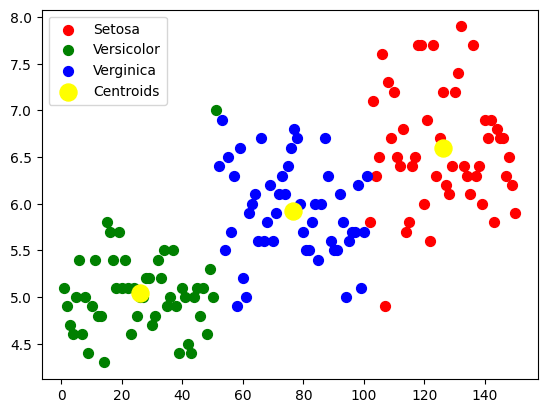

In [8]:
import pandas as pd
iris = pd.read_csv("IRIS.csv")

x = iris.iloc[:,:-1].values
y = iris.iloc[:, -1].values

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3)
y_pred = kmeans.fit_predict(x)
# print(kmeans.cluster_centers_)

import matplotlib.pyplot as plt
plt.scatter(x[y_pred == 0,0], x[y_pred == 0,1], s=50, c='red', label='Setosa')
plt.scatter(x[y_pred == 1,0], x[y_pred == 1,1], s=50, c='green', label='Versicolor')
plt.scatter(x[y_pred == 2,0], x[y_pred == 2,1], s=50, c='blue', label='Verginica')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=150, c='yellow', label='Centroids')

plt.legend()
plt.show()

# KMeans Clustering in 3D

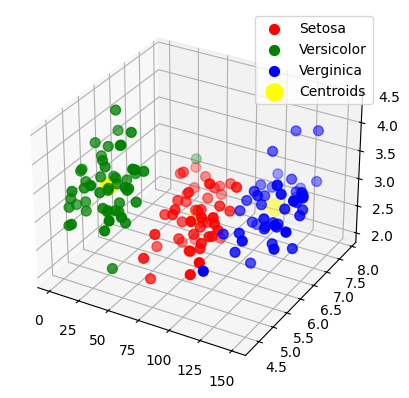

In [2]:
import pandas as pd
iris = pd.read_csv("IRIS.csv")

x = iris.iloc[:,:-1].values
y = iris.iloc[:, -1].values

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3)
y_pred = kmeans.fit_predict(x)
# print(kmeans.cluster_centers_)

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x[y_pred == 0,0], x[y_pred == 0,1], x[y_pred == 0,2], s=50, c='red', label='Setosa')
ax.scatter(x[y_pred == 1,0], x[y_pred == 1,1], x[y_pred == 1,2], s=50, c='green', label='Versicolor')
ax.scatter(x[y_pred == 2,0], x[y_pred == 2,1], x[y_pred == 2,2], s=50, c='blue', label='Verginica')
ax.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], kmeans.cluster_centers_[:,2], s=150, c='yellow', label='Centroids')

plt.legend()
plt.show()

# Hierarchical Clustering


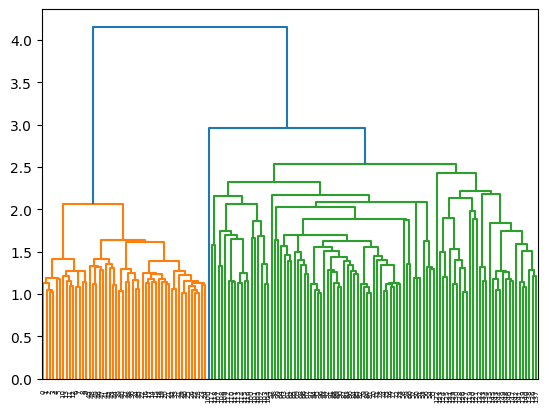

In [3]:
import pandas as pd
iris = pd.read_csv("IRIS.csv")

x = iris.iloc[:,:-1].values
y = iris.iloc[:, -1].values

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3)
y_pred = hc.fit_predict(x)
#print(kmeans.cluster_centers_)

import matplotlib.pyplot as plt
plt.scatter(x[kmeans == 0,0], x[kmeans == 0,1], s=50, c='red', label='Setosa')
plt.scatter(x[kmeans == 1,0], x[kmeans == 1,1], s=50, c='green', label='Versicolor')
plt.scatter(x[kmeans == 2,0], x[kmeans == 2,1], s=50, c='blue', label='Verginica')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=150, c='yellow', label='Centroids')

from scipy.cluster.hierarchy import dendrogram, linkage
dendrogram(linkage(x))
plt.show()